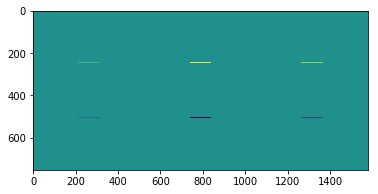

In [154]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import convolve

d = 0.1

x = np.arange(0, 157.8+d, d)
y = np.arange(0, 75+d, d)

X, Y = np.meshgrid(x, y)

phi = np.zeros_like(X)

isneg1 = np.zeros_like(X, dtype=bool)
ispos1 = np.zeros_like(X, dtype=bool)
isneg2 = np.zeros_like(X, dtype=bool)
ispos2 = np.zeros_like(X, dtype=bool)
isneg3 = np.zeros_like(X, dtype=bool)
ispos3 = np.zeros_like(X, dtype=bool)
bound = np.zeros_like(X, dtype=bool)

isneg1[(X>=21.3)*(X<=31.3)*(Y>=50)*(Y<=50.5)] = True
isneg2[(X>=73.9)*(X<=83.9)*(Y>=50)*(Y<=50.5)] = True
isneg3[(X>=126.5)*(X<=136.5)*(Y>=50)*(Y<=50.5)] = True

ispos1[(X>=21.3)*(X<=31.3)*(Y>=24.5)*(Y<=25)] = True
ispos2[(X>=73.9)*(X<=83.9)*(Y>=24.5)*(Y<=25)] = True
ispos3[(X>=126.5)*(X<=136.5)*(Y>=24.5)*(Y<=25)] = True
#ispos[(X>=18)*(X<=20)*(Y>=20)*(Y<=28)] = True

bound[:,0] = bound[:,-1] = bound[0,:] = bound[-1,:] = True

phi[isneg1] = -2.0
phi[ispos1] = +2.0
phi[isneg2] = -6.0
phi[ispos2] = +6.0
phi[isneg3] = -4.0
phi[ispos3] = +4.0
phi[bound] =  0.0

updateme = np.ones_like(X, dtype=bool)
updateme[isneg1] = updateme[ispos1] =updateme[isneg2] = updateme[ispos2]=updateme[isneg3] = updateme[ispos3] =updateme[bound] = False

kernel = 0.25*np.array([[0, 1, 0], [1, 0, 1], [0, 1, 0]], dtype=float)


plt.imshow(phi)

In [155]:
phi0 = phi.copy()  # keep the original handy
keepers = 0, 100, 500, 1000, 2000, 9999
keep = []
for i in range(10000):
    if i in keepers:
        keep.append(phi.copy())
        print(i)
    phi2 = convolve(phi, kernel)
    phi[updateme] = phi2[updateme]

0
100
500
1000
2000
9999


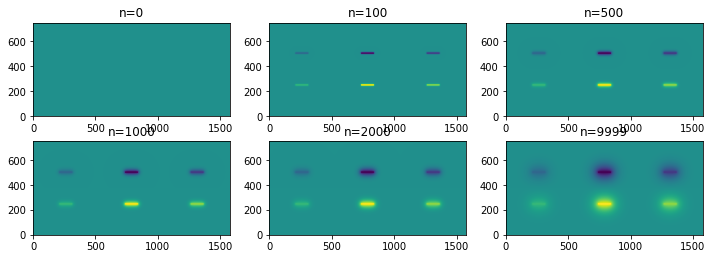

In [156]:
%matplotlib inline
plt.figure(figsize=(12,4))
for i, (thing, n) in enumerate(zip(keep, keepers)):
    plt.subplot(2, 3, i+1)
    plt.imshow(thing, origin='lower')
    plt.title("n="+str(n))
plt.show()

In [157]:
p = keep[-1]
e = np.zeros_like(p)
print(p.shape, e[0,0])
for i in range(1,e.shape[0]-1):
    for j in range(1,e.shape[1]-1):
        e[i,j] = np.sqrt((p[i+1,j] - p[i-1,j])**2 + (p[i,j+1] - p[i,j-1])**2)
e*=1000/d/2

(751, 1579) 0.0


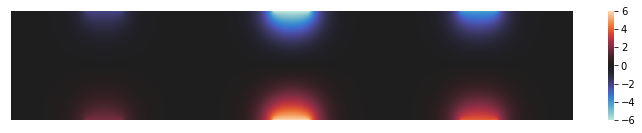

In [158]:
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt
from matplotlib.colors import LogNorm, Normalize

plt.figure(figsize=(12.6,2))

uniform_data = np.random.rand(10, 12)
ax = sns.heatmap(p, cmap='icefire')

#plt.xlim([0,157.8])
plt.ylim([250,500])
ax.axes.xaxis.set_visible(False)
ax.axes.yaxis.set_visible(False)
#plt.savefig('electric_potential.png')

plt.show()


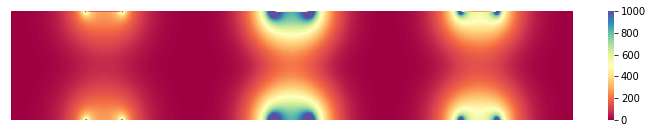

In [159]:
plt.figure(figsize=(12.6,2))
uniform_data = np.random.rand(10, 12)
ax = sns.heatmap(e, cmap='Spectral', vmax=1000)
plt.ylim([250,500])
ax.axes.xaxis.set_visible(False)
ax.axes.yaxis.set_visible(False)
#plt.savefig('electric_field.png', dpi=600)
#plt.savefig('electric_field.eps', format='eps')

plt.show()